# Test the implementation of the Feed Forward NN

In [162]:
import NotebookLoader
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import FeedForwardNN as ff
reload(ff)

importing Jupyter notebook from FeedForwardNN.ipynb


<module 'FeedForwardNN' from 'FeedForwardNN.ipynb'>

## Test the implementation on mock data

In [177]:
%matplotlib inline
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
y = np.array([y]).T
print("Data shape:" + str(y.shape))

Data shape:(200L, 1L)


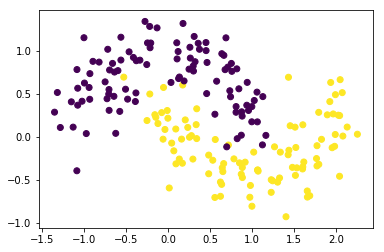

In [185]:
plt.scatter(X[:,0], X[:,1], c=y)

In [180]:
m = ff.Model2Layers(learning_rate = 0.8, input_dim= 2, output_dim=1, hidden_dim =5)
m.back_propagation(X,y)

Error    after 0 iterations:0.336960885152
Accuracy after 0 iterations:1.0
Error    after 10000 iterations:0.0160790132269
Accuracy after 10000 iterations:1.0
Error    after 20000 iterations:0.0113440622282
Accuracy after 20000 iterations:1.0
Error    after 30000 iterations:0.0137852590084
Accuracy after 30000 iterations:1.0
Error    after 40000 iterations:0.0121776696565
Accuracy after 40000 iterations:1.0
Error    after 50000 iterations:0.0127486359326
Accuracy after 50000 iterations:1.0


In [187]:
m.predict(np.array([-1,1]))

0

## Test the implementation on iris dataset

In [266]:
iris = sklearn.datasets.load_iris()
X = iris["data"]
y_classes = iris["target"]
num_samples = X.shape[0]
num_classes = max(y_classes)+1

#one hot encoding
y = np.zeros((num_samples,num_classes))
y[range(num_samples),y_classes]=1

In [267]:
print("Classes of flowers " + str(iris.target_names))
print("Features " + str(iris.feature_names))
print("Number of features for a sample " +str(X.shape[1]))
print("Total number of samples " +str(X.shape[0]))
print(X[0:5])

Classes of flowers ['setosa' 'versicolor' 'virginica']
Features ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Number of features for a sample 4
Total number of samples 150
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


([], <a list of 0 Text yticklabel objects>)

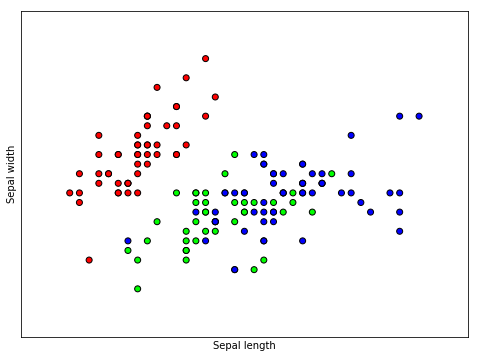

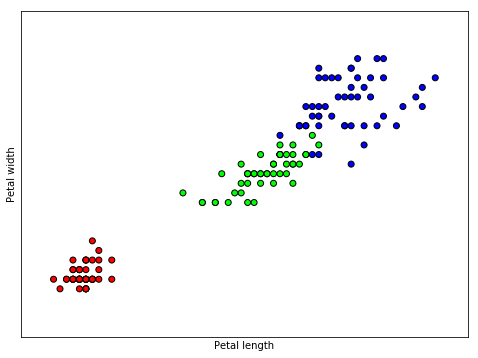

In [273]:
#Sepal length and sepal width plot

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(1, figsize=(8, 6))

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

#SPetal length and Petal width plot

x_min, x_max = X[:, 2].min() - .5, X[:, 2].max() + .5
y_min, y_max = X[:, 3].min() - .5, X[:, 3].max() + .5

plt.figure(2, figsize=(8, 6))

# Plot the training points
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

### Compute accuracy using 10-fold crossvalidation

In [262]:
#10-fold cross validation for the iris dataset
k = 10
avg_acc_n= 0

for it in range(k):
    X_train = np.array([x for i, x in enumerate(X) if i % k != it])
    X_test = np.array([x for i, x in enumerate(X) if i % k == it])
    Y_train = np.array([x for i, x in enumerate(y) if i % k != it])
    Y_test = np.array([x for i, x in enumerate(y) if i % k == it])
    print("Cross validation %d" %it)
    
    m_iris = ff.Model2Layers(learning_rate = 0.001, input_dim= 4, output_dim=3, hidden_dim =5)
    m_iris.back_propagation(X_train,Y_train, no_iterations = 100000)
    
    predictions = m_iris.feed_forward(X_test)
    acc= m_iris.compute_accuracy(predictions, Y_test)
    avg_acc_n +=acc
    print("Accuracy for cross validation %d is %lf" %(it,acc))
avg_acc_n /= k

Cross validation 0
Error    after 0 iterations:0.441689121936
Accuracy after 0 iterations:0.333333333333
Error    after 10000 iterations:0.0971723808885
Accuracy after 10000 iterations:0.888888888889
Error    after 20000 iterations:0.0874663044122
Accuracy after 20000 iterations:0.948148148148
Error    after 30000 iterations:0.0844245356757
Accuracy after 30000 iterations:0.955555555556
Error    after 40000 iterations:0.0198962831015
Accuracy after 40000 iterations:0.985185185185
Error    after 50000 iterations:0.0108191709576
Accuracy after 50000 iterations:0.992592592593
Error    after 60000 iterations:0.00912381399315
Accuracy after 60000 iterations:0.992592592593
Error    after 70000 iterations:0.00836554499952
Accuracy after 70000 iterations:0.992592592593
Error    after 80000 iterations:0.00791074068498
Accuracy after 80000 iterations:0.992592592593
Error    after 90000 iterations:0.00759562165689
Accuracy after 90000 iterations:0.992592592593
Accuracy for cross validation 0 is 0

In [263]:
print("Average accuracy obtained by 10-fold cross-validation %fl"  %avg_acc_n)

Average accuracy obtained by 10-fold cross-validation 0.973333l


### Test normalization of the data

In [264]:
#10-fold cross validation for the iris dataset normalized
k = 10
avg_acc= 0

X_normalized = X.copy()
y_normalized = y.copy()

X_normalized[:, 0] = (X_normalized[:,0]-min(X_normalized[:,0]))/(max(X_normalized[:,0])-min(X_normalized[:,0]))
X_normalized[:, 1] = (X_normalized[:,1]-min(X_normalized[:,1]))/(max(X_normalized[:,1])-min(X_normalized[:,1]))
X_normalized[:, 2] = (X_normalized[:,2]-min(X_normalized[:,2]))/(max(X_normalized[:,2])-min(X_normalized[:,2]))
X_normalized[:, 3] = (X_normalized[:,3]-min(X_normalized[:,3]))/(max(X_normalized[:,3])-min(X_normalized[:,3]))

print(X_normalized[0:5])

for it in range(k):
    X_train = np.array([x for i, x in enumerate(X_normalized) if i % k != it])
    X_test = np.array([x for i, x in enumerate(X_normalized) if i % k == it])
    Y_train = np.array([x for i, x in enumerate(y_normalized) if i % k != it])
    Y_test = np.array([x for i, x in enumerate(y_normalized) if i % k == it])
    print("Cross validation %d" %it)
    
    m_iris = ff.Model2Layers(learning_rate = 0.001, input_dim= 4, output_dim=3, hidden_dim =5)
    m_iris.back_propagation(X_train,Y_train, no_iterations = 100000)
    
    predictions = m_iris.feed_forward(X_test)
    acc= m_iris.compute_accuracy(predictions, Y_test)
    avg_acc +=acc
    print("Accuracy for cross validation %d is %lf" %(it,acc))
avg_acc /= k

[[ 0.22222222  0.625       0.06779661  0.04166667]
 [ 0.16666667  0.41666667  0.06779661  0.04166667]
 [ 0.11111111  0.5         0.05084746  0.04166667]
 [ 0.08333333  0.45833333  0.08474576  0.04166667]
 [ 0.19444444  0.66666667  0.06779661  0.04166667]]
Cross validation 0
Error    after 0 iterations:0.378863913203
Accuracy after 0 iterations:0.333333333333
Error    after 10000 iterations:0.0661002625168
Accuracy after 10000 iterations:0.962962962963
Error    after 20000 iterations:0.0196005390762
Accuracy after 20000 iterations:0.977777777778
Error    after 30000 iterations:0.013280679933
Accuracy after 30000 iterations:0.977777777778
Error    after 40000 iterations:0.0111805883672
Accuracy after 40000 iterations:0.977777777778
Error    after 50000 iterations:0.0101200165035
Accuracy after 50000 iterations:0.985185185185
Error    after 60000 iterations:0.00948670375002
Accuracy after 60000 iterations:0.985185185185
Error    after 70000 iterations:0.00907234946785
Accuracy after 70000

In [265]:
print("Average accuracy obtained by 10-fold cross-validation on normalized data %fl"  %avg_acc)

Average accuracy obtained by 10-fold cross-validation on normalized data 0.980000l


### Train with different regularization factor

In [231]:
#Split 20% test a80% train

np.random.shuffle(X[0:50])
np.random.shuffle(X[50:100])
np.random.shuffle(X[100:150])

X_train = np.array([x for i, x in enumerate(X) if i % 5 != 0])
X_test = np.array([x for i, x in enumerate(X) if i % 5 == 0])
Y_train = np.array([x for i, x in enumerate(y) if i % 5 != 0])
Y_test = np.array([x for i, x in enumerate(y) if i % 5 == 0])

In [226]:
m_iris = ff.Model2Layers(learning_rate = 0.001, reg_lambda = 0.0005, input_dim= 4, output_dim=3, hidden_dim =5)
m_iris.back_propagation(X_train,Y_train, no_iterations = 100000)
predictions = m_iris.feed_forward(X_test)
acc= m_iris.compute_accuracy(predictions, Y_test)
print("Accuracy on test for 0.0005 regularization factor %lf" %acc)

m_iris = ff.Model2Layers(learning_rate = 0.01, reg_lambda = 0.001, input_dim= 4, output_dim=3, hidden_dim =5)
m_iris.back_propagation(X_train,Y_train, no_iterations = 100000)
predictions = m_iris.feed_forward(X_test)
acc= m_iris.compute_accuracy(predictions, Y_test)
print("Accuracy on test for 0.001 regularization factor %lf" %acc)

Error    after 0 iterations:0.441726030141
Accuracy after 0 iterations:0.333333333333
Error    after 10000 iterations:0.0980581765134
Accuracy after 10000 iterations:0.891666666667
Error    after 20000 iterations:0.0877514450936
Accuracy after 20000 iterations:0.95
Error    after 30000 iterations:0.0845985863856
Accuracy after 30000 iterations:0.958333333333
Error    after 40000 iterations:0.0357030783659
Accuracy after 40000 iterations:0.983333333333
Error    after 50000 iterations:0.00999170303178
Accuracy after 50000 iterations:0.983333333333
Error    after 60000 iterations:0.00718675521681
Accuracy after 60000 iterations:0.983333333333
Error    after 70000 iterations:0.00612876390375
Accuracy after 70000 iterations:0.991666666667
Error    after 80000 iterations:0.00553768042198
Accuracy after 80000 iterations:0.991666666667
Error    after 90000 iterations:0.00514199052898
Accuracy after 90000 iterations:1.0
Accuracy on test for 0.0005 regularization factor 0.966667
Error    after 0

### Train with different hidden layer sizes

In [224]:
m_iris = ff.Model2Layers(learning_rate = 0.001, reg_lambda = 0.001, input_dim= 4, output_dim=3, hidden_dim =3)
m_iris.back_propagation(X_train,Y_train, no_iterations = 100000)
predictions = m_iris.feed_forward(X_test)
acc= m_iris.compute_accuracy(predictions, Y_test)
print("Accuracy on test for 0.0005 regularization factor %lf" %acc)

m_iris = ff.Model2Layers(learning_rate = 0.01, reg_lambda = 0.001, input_dim= 4, output_dim=3, hidden_dim =7)
m_iris.back_propagation(X_train,Y_train, no_iterations = 100000)
predictions = m_iris.feed_forward(X_test)
acc= m_iris.compute_accuracy(predictions, Y_test)
print("Accuracy on test for 0.001 regularization factor %lf" %acc)

Error    after 0 iterations:0.418371524099
Accuracy after 0 iterations:0.333333333333
Error    after 10000 iterations:0.022363513761
Accuracy after 10000 iterations:0.983333333333
Error    after 20000 iterations:0.0135328848098
Accuracy after 20000 iterations:0.983333333333
Error    after 30000 iterations:0.0113679338901
Accuracy after 30000 iterations:0.983333333333
Error    after 40000 iterations:0.0103241420756
Accuracy after 40000 iterations:0.991666666667
Error    after 50000 iterations:0.00968913043188
Accuracy after 50000 iterations:0.991666666667
Error    after 60000 iterations:0.00925192263628
Accuracy after 60000 iterations:0.991666666667
Error    after 70000 iterations:0.00892669174547
Accuracy after 70000 iterations:0.991666666667
Error    after 80000 iterations:0.0086716535065
Accuracy after 80000 iterations:0.991666666667
Error    after 90000 iterations:0.00846389166317
Accuracy after 90000 iterations:0.991666666667
Accuracy on test for 0.0005 regularization factor 0.9666

### Make predictions

In [233]:
m_iris = ff.Model2Layers(learning_rate = 0.001, reg_lambda = 0.001, input_dim= 4, output_dim=3, hidden_dim =5)
m_iris.back_propagation(X_train,Y_train, no_iterations = 100000)

Error    after 0 iterations:0.441680133712
Accuracy after 0 iterations:0.333333333333
Error    after 10000 iterations:0.100166967542
Accuracy after 10000 iterations:0.866666666667
Error    after 20000 iterations:0.0886816182376
Accuracy after 20000 iterations:0.95
Error    after 30000 iterations:0.0852805444537
Accuracy after 30000 iterations:0.95
Error    after 40000 iterations:0.0407808792451
Accuracy after 40000 iterations:0.983333333333
Error    after 50000 iterations:0.0108564041708
Accuracy after 50000 iterations:0.983333333333
Error    after 60000 iterations:0.00767042464838
Accuracy after 60000 iterations:0.983333333333
Error    after 70000 iterations:0.0064916183399
Accuracy after 70000 iterations:0.991666666667
Error    after 80000 iterations:0.00584108230362
Accuracy after 80000 iterations:0.991666666667
Error    after 90000 iterations:0.00540965703205
Accuracy after 90000 iterations:0.991666666667


In [247]:
sample_test = 0
print([str((i,x)) for x,i in zip(X_test[sample_test],iris.feature_names)])
pred = m_iris.predict(X_test[0])
print("Predicted    %d -> %s" %(pred ,iris.target_names[pred]))
actual = np.argmax(Y_test[sample_test])
print("Actual class %d -> %s" %(actual,iris.target_names[actual]))

["('sepal length (cm)', 4.7000000000000002)", "('sepal width (cm)', 3.2000000000000002)", "('petal length (cm)', 1.6000000000000001)", "('petal width (cm)', 0.20000000000000001)"]
Predicted    0 -> setosa
Actual class 0 -> setosa
